### CS231 PPT

트랜스퍼 러닝이 중요한 이유. 데이터가 별로 없는 상황에서도 성능을 올릴 수 있다. 이미지넷 활용하면 굉장히 성능 좋은 모델을 가져올 수 있다.


### 배치 노말라이제이션

배치사이즈만큼 노말라이즈 하는 기법이다. 보통 노말라이즈라고 하면 배치노말라이즈를 의미한다.
 
### 커널사이즈에 대한 고찰 ★★★

VGG16은 레이어가 16, 19는 19개라는 것이다. 그래서 커널사이즈를 줄이고 레이어를 깊게 하는 기법을 썼다. 작은 필터를 왜 썼는가? 3바이 3을 3번 누적한게 7바이 7 하나 쓴 효과가 난다. 그런데 층이 많을 수록, 새로운 값으로 변형이 난다! (활성화 함수) 그래서 3바이 3을 쓴 것이다. 


### 구글넷

1바이 1컨볼루션은 차원축소의 역할을 해준다... ★★★

1바이1 레이어 때문에, 계산 복잡도를 줄일 수 있었다(?) 비슷한 레이어는 풀링 레이어가 있다.

구글넷은 그냥 역사다. 우리가 쓸일이 없으니 그냥 넘어가도 된다. 그냥 원바이 원만 기억해라.

In [11]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [12]:
model = InceptionV3()
model2 = VGG16()
model3 = MobileNet()
model4 = MobileNetV2()

14540800/14536120 [==============================] - 2s 0us/step


In [4]:
model.summary() # non-sequencial

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [7]:
model2.summary() # sequencial

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model4.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

배치노말라이제이션은 액티베이션 전에 해주는 거다. 액티베이션 전에 배치노말라이즈 해줄려고, 이렇게 배치노말라이즈를 빼는 거다. 하지만 사실상 Dense에서 한 번에 적용되는 거랑 같다.

In [1]:
from tensorflow.keras.layers import ReLU, BatchNormalization, InputLayer, Convolution2D
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.layers import Conv2D

In [17]:
MyModel = Sequential([
    Conv2D(32,(3, 3), input_shape = (28, 28, 1)),
    Conv2D(64, (3, 3)),
    Conv2D(128, (3, 3))
])

In [18]:
MyModel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 128)       73856     
Total params: 92,672
Trainable params: 92,672
Non-trainable params: 0
_________________________________________________________________


In [14]:
(3 * 3 + 1) * 32

320

In [12]:
(9 * 32 + 1) * 64

18496

In [13]:
(9 * 64  + 1) * 128

73856

### Detection

 - 윈도우 크기의 문제: 작은 윈도우 ~ 큰 윈도우를 거치면서 영역 크기 안에 들어오는 애들을 감지해야 한다. 크기에 따라서 성능차이가 많이 나게 된다.
 - 싱클 디텍션: 이미지 상에서 가장 큰거 1개만 찾는다.
 - 멀티 디텍션: 이미지 상에서 여러개 찾는다.
 - selective search: 비슷한 질감이나 색, 강도 등이 비슷한 색깔끼리 연결된, 그것들을 둘러싸는 다양한 크기의 window를 찾음

### R-CNN

 - selective search로 영역을 찾은 후, 알렉스 넷을 통해서 CNN을 거치고 SVM으로 분류했다.
 - 최초의 딥러닝을 이용한 디텍션을 적용했다는 것이 의미가 있다.
 - 하지만 리사이즈를 했기 때문에, 이미지 변형이 일어나 성능 저하가 발생할 수 있음.
 - 욜로는 1페이지 엔드 투 앤드 모델이다. 속도 굉장히 빠르다.
 - 비율을 맞추기 위한 기법... SPP RCNN. 암튼 SPP는 비율 맞추는 것만 기억해라.
 - fast-RCNN: R-CNN보다 train속도가 9배 빠르다.

### 실습

In [1]:
from tensorflow.keras.applications import VGG16

In [4]:
model = VGG16(include_top = False)

In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

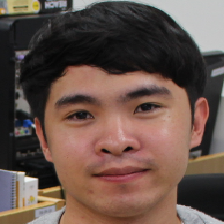

In [11]:
x = load_img('C:/aaa.png', target_size=(224, 224))
x

In [13]:
img_x = img_to_array(x)
img_x.shape

(224, 224, 3)

In [16]:
t = preprocess_input(img_x)

In [18]:
import numpy as np
t = t[np.newaxis]

In [20]:
t.shape

(1, 224, 224, 3)

In [19]:
model.predict(t)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node block1_conv1_1/Conv2D (defined at C:\Users\white\Anaconda3\envs\tf2.0-gpu\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_1100]

Function call stack:
keras_scratch_graph
